# Top Repositories By Language

I was curious about what the most popular projects on github (as measured by number of stargazers) were for three languages - Python, Javascript and C. Below is my approach to finding answers to this question.

# Top Repositories In Python

I will find the top projects written in python using the following API: 'https://api.github.com/search/repositories?q=language:python&sort=stars'. Specifically, I will use response_dict, the dictionary we get after calling the API.

In [3]:
import requests
url = 'https://api.github.com/search/repositories?q=language:Python&sort=stars'
r = requests.get(url)

response_dict = r.json()

Upon exploring response_dict['items'] further, it can be see that it consists of a list of repositories, where each element of the list is a dictionary containing relevant information. The information stored under keys 'name" and 'stargazers_count" will be particularly useful for our purposes.

In [4]:
print("Name of the repository: " + response_dict['items'][0]['name'])
print("Stargazers Count: " + str(response_dict['items'][0]['stargazers_count']))

Name of the repository: public-apis
Stargazers Count: 231347


Let us iterate acaross response_dict, and store two pieces of data in a list of tuples - the name of the repository, and the number of stargazers. 

In [5]:
reposByName = []
reposByStargazers = []

for x in response_dict['items']:
    reposByName.append(x['name'])
    reposByStargazers.append(x['stargazers_count'])

We can then turn this data into a bar chart, of the top ten most popular Python projects on Github: 

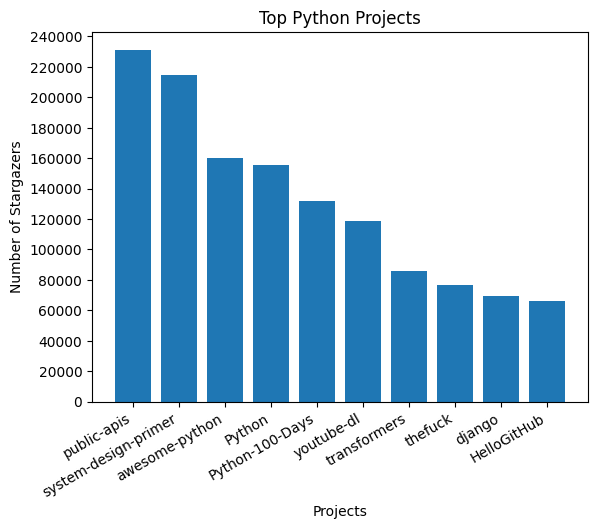

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(reposByName[0:10])
y = np.array(reposByStargazers[0:10])

plt.bar(x,y)
plt.xlabel("Projects")
plt.ylabel("Number of Stargazers")
plt.title("Top Python Projects")

#Rotates the x-axis labels to make them more readable
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')

#Increase number of ticks on y-axis
plt.locator_params(axis='y', nbins=15)

plt.show()

# Reusing Existing Code

In order to create charts for the two other languages quicker, let us turn our existing code into a function. This will allow us to reuse them.

In [8]:
def top_10_chart(Language): 
    url = 'https://api.github.com/search/repositories?q=language:' + Language + '&sort=stars'
    r = requests.get(url)

    response_dict = r.json()
    
    
    reposByName = []
    reposByStargazers = []

    for x in response_dict['items']:
        reposByName.append(x['name'])
        reposByStargazers.append(x['stargazers_count'])
        
    x = np.array(reposByName[0:10])
    y = np.array(reposByStargazers[0:10])

    plt.bar(x,y)
    plt.xlabel("Projects")
    plt.ylabel("Number of Stargazers")
    plt.title("Top "+ Language + " Projects")

    #Rotates the x-axis labels to make them more readable
    plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
    
    #Increase number of ticks on y-axis
    plt.locator_params(axis='y', nbins=15)
    
    plt.show()

# Top Repositories In Javascript


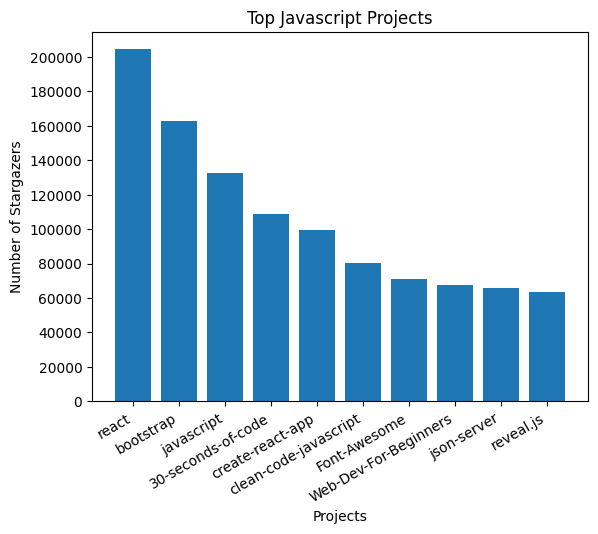

In [9]:
top_10_chart('Javascript')

# Top Repositories In C

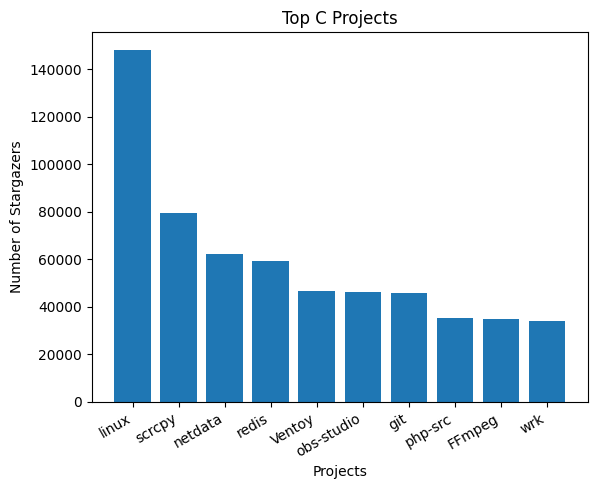

In [10]:
top_10_chart('C')